In [615]:
import numpy as np
import matplotlib.pyplot as plt
from axessettings import AxesSetting
import pandas as pd
from scipy.interpolate import interp1d

## (1)
オフセット調整の抵抗値：

どの程度？
時計回りに回すと下がる
GB(ゲインバンド)積一定
ユニティゲイン周波数 700kHz


## (2)
見る周波数

線形性保たれる？
(a)利得20dB→抵抗比10
(b)40dB→比100

In [616]:
fp = 5
wp = 2*np.pi*fp
print(wp)
A0 = 10**(106/20)
def A(f):
    return A0/(1+1j*(2*np.pi*f)/wp)
gain_dB = lambda f: 20*np.log10(np.abs(A(f)))
f_u = A0*fp
print(f"$f_u$ = {f_u:.3} Hz")

31.41592653589793
$f_u$ = 9.98e+05 Hz


In [617]:
#(a)
R1 = 989.3
R2=  9738
RR = R2/R1

gain_dB_20_theory = lambda f: 20*np.log10(abs(-RR/(1+(1+RR)/A(f))))
gain_phase_20_theory = lambda f: np.angle(-RR/(1+(1+RR)/A(f)))/np.pi*180
print(gain_dB_20_theory(1e6))

-0.8976243084998891


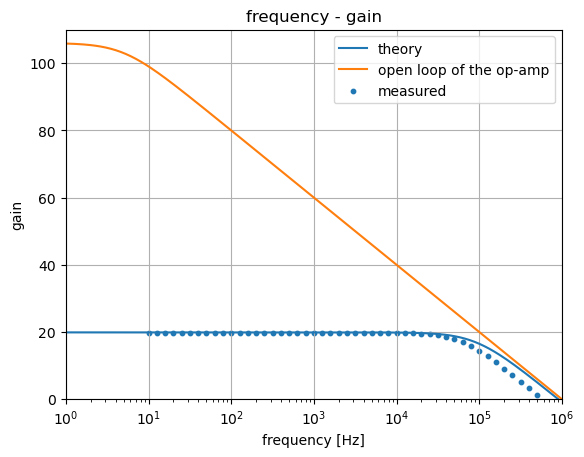

In [618]:
gain_20 = pd.read_csv("1_bode_invert_1k_10k.csv")

fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency [Hz]", ylabel="gain", grid="both", xlim=(1,1e6), ylim=(0,110),xscale="log", title="frequency - gain")
axstg.plot_func(ax, gain_dB_20_theory, label="theory")
axstg.plot_func(ax, gain_dB, label="open loop of the op-amp")
ax.scatter(gain_20["freq"], 20*np.log10(gain_20["gain"]), s=10,label="measured")
axstg.apply_axes(ax)

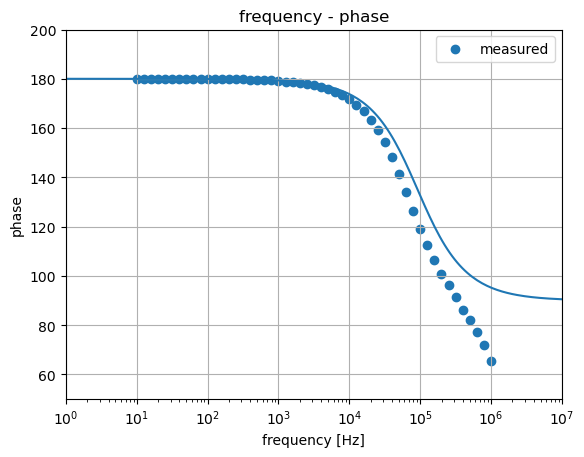

In [619]:
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency [Hz]", ylabel="phase", grid="both", xlim=(1,1e7),ylim=(50,200),xscale="log", title="frequency - phase")
axstg.plot_func(ax, gain_phase_20_theory)
ax.scatter(gain_20["freq"], gain_20["phase"]+360, label="measured")
axstg.apply_axes(ax)

In [620]:
#(b)
R1 = 1001
R2=  99740
RR2 = R2/R1

gain_dB_40_theory = lambda f: 20*np.log10(abs(-RR2/(1+(1+RR2)/A(f))))
gain_phase_40_theory = lambda f: np.angle(-RR2/(1+(1+RR2)/A(f)))/np.pi*180
print(gain_dB_40_theory(1e6))

-0.10776495242812893


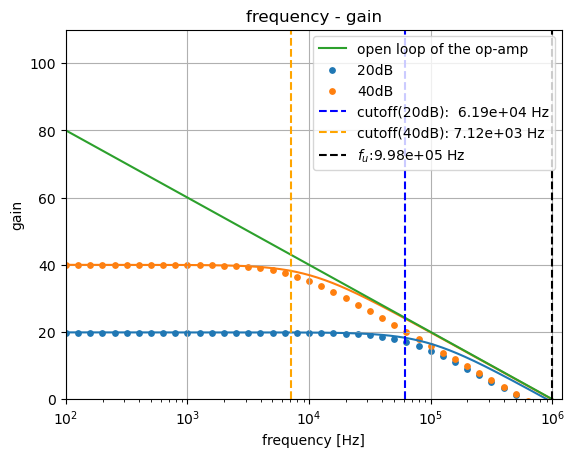

In [621]:
gain_40 = pd.read_csv("1_bode_invert_1k_100k.csv")

gain_20["gain_dB"] = 20 * np.log10(gain_20["gain"])
gain_40["gain_dB"] = 20 * np.log10(gain_40["gain"])

# 線形補完
interp_func_20 = interp1d(gain_20["gain_dB"], gain_20["freq"], bounds_error=False, fill_value="extrapolate")
interp_func_40 = interp1d(gain_40["gain_dB"], gain_40["freq"], bounds_error=False, fill_value="extrapolate")

# cutoff周波数を求める
freq_17dB = interp_func_20(17)
freq_37dB = interp_func_40(37)
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency [Hz]", ylabel="gain", grid="both", xlim=(1e2,1.2e6), ylim=(0,110),xscale="log", title="frequency - gain")
axstg.plot_func(ax, gain_dB_20_theory)
axstg.plot_func(ax, gain_dB_40_theory)
axstg.plot_func(ax, gain_dB, label="open loop of the op-amp")
ax.scatter(gain_20["freq"], 20*np.log10(gain_20["gain"]), label="20dB",s=15)
ax.scatter(gain_40["freq"], 20*np.log10(gain_40["gain"]), label="40dB",s=15)
ax.axvline(x=freq_17dB, color='b', linestyle='--', label=f'cutoff(20dB):  {freq_17dB:.2e} Hz')
ax.axvline(x=freq_37dB, color='orange', linestyle='--', label=f'cutoff(40dB): {freq_37dB:.2e} Hz')
ax.axvline(f_u, color="black", linestyle="--", label=f"$f_u$:{f_u:.2e} Hz")
axstg.apply_axes(ax)

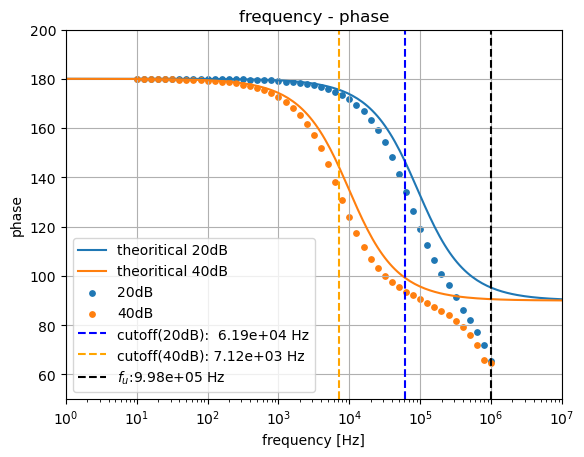

In [622]:
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency [Hz]", ylabel="phase", grid="both", xlim=(1,1e7),ylim=(50,200),xscale="log", title="frequency - phase")
axstg.plot_func(ax, gain_phase_20_theory, label = "theoritical 20dB")
axstg.plot_func(ax, gain_phase_40_theory, label = "theoritical 40dB")
ax.scatter(gain_20["freq"], gain_20["phase"]+360, label="20dB",s =15)
ax.scatter(gain_40["freq"], gain_40["phase"], label="40dB", s=15)
ax.axvline(x=freq_17dB, color='b', linestyle='--', label=f'cutoff(20dB):  {freq_17dB:.2e} Hz')
ax.axvline(x=freq_37dB, color='orange', linestyle='--', label=f'cutoff(40dB): {freq_37dB:.2e} Hz')
ax.axvline(f_u, color="black", linestyle="--", label=f"$f_u$:{f_u:.2e} Hz")
axstg.apply_axes(ax)

## (3)
周波数を変化させたときの波形変化の様子

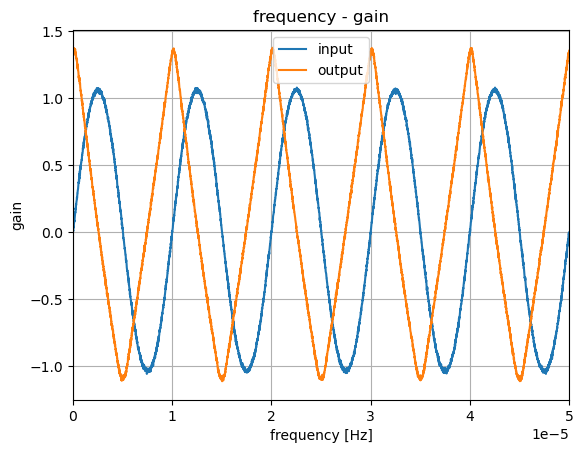

In [623]:
tri = pd.read_csv("1_bode_1k_100k_100kHztriangle.csv")
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency [Hz]", ylabel="gain", grid="both", xlim=(0,0.00005),title="frequency - gain")
ax.plot(tri["freq"], tri["CH1"], label="input")
ax.plot(tri["freq"], tri["CH2"]+12, label="output")
axstg.apply_axes(ax)

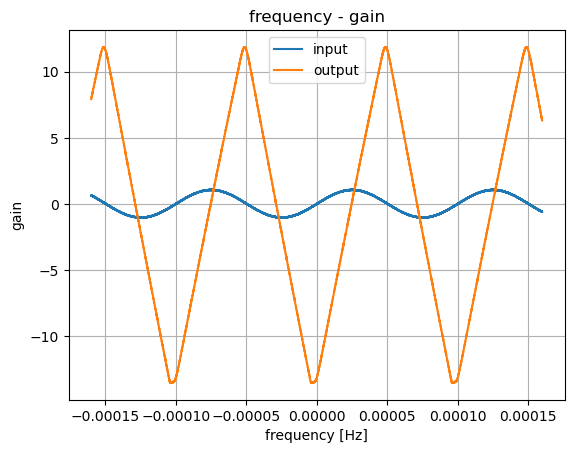

In [624]:
tri = pd.read_csv("1_osc_noinvert_2Vpp_10kHz_1k_100k.csv")
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency [Hz]", ylabel="gain", grid="both",title="frequency - gain")
ax.plot(tri["freq"], tri["CH1"], label="input")
ax.plot(tri["freq"], tri["CH2"], label="output")
axstg.apply_axes(ax)

## (4)
非反転

(a)抵抗比
(b)抵抗比

周波数に対する波形の変化


In [625]:
#(a)
Rr = 1001
Rf = 9738
RR = (Rf+Rr)/Rr 
gain_dB_20_theory = lambda f: 20*np.log10(abs(RR*A(f)*RR**-1/(1+A(f)*RR**-1)))
gain_phase_20_theory = lambda f: np.angle(RR*A(f)*RR**-1/(1+A(f)*RR**-1))/np.pi*180

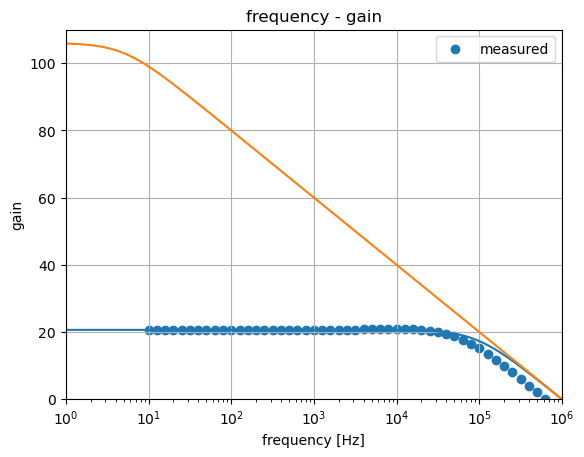

In [626]:
gain_20 = pd.read_csv("1_bode_noinvert_1k_10k.csv")


fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency [Hz]", ylabel="gain", grid="both", xlim=(1,1e6), ylim=(0,110),xscale="log", title="frequency - gain")
axstg.plot_func(ax, gain_dB_20_theory)
axstg.plot_func(ax, gain_dB)
ax.scatter(gain_20["freq"], 20*np.log10(gain_20["gain"]), label="measured")
axstg.apply_axes(ax)

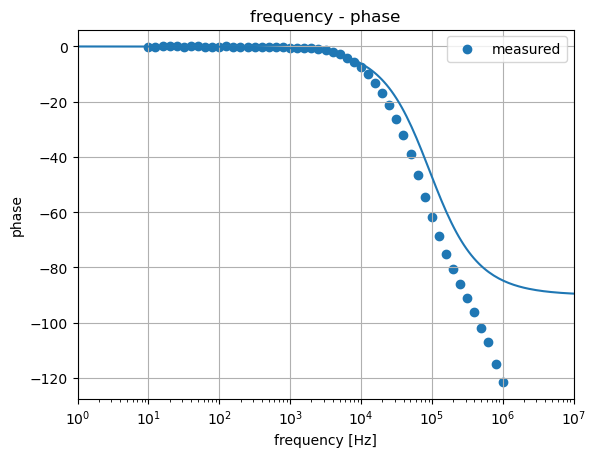

In [627]:
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency [Hz]", ylabel="phase", grid="both", xlim=(1,1e7),xscale="log", title="frequency - phase")
axstg.plot_func(ax, gain_phase_20_theory)
ax.scatter(gain_20["freq"], gain_20["phase"], label="measured")
axstg.apply_axes(ax)

In [628]:
#(b)
Rf2 = 99090
RR2 = (Rf2+Rr)/Rr 
gain_dB_40_theory = lambda f: 20*np.log10(abs(RR2*A(f)*RR2**-1/(1+A(f)*RR2**-1)))
gain_phase_40_theory = lambda f: np.angle(RR2*A(f)*RR2**-1/(1+A(f)*RR2**-1))/np.pi*180

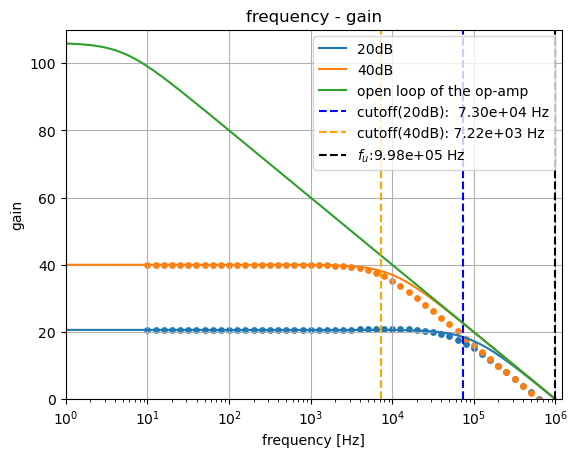

In [629]:
gain_40 = pd.read_csv("1_bode_noinvert_1k_100k.csv")
gain_20["gain_dB"] = 20 * np.log10(gain_20["gain"])
gain_40["gain_dB"] = 20 * np.log10(gain_40["gain"])

# 線形補完
interp_func_20 = interp1d(gain_20["gain_dB"], gain_20["freq"], bounds_error=False, fill_value="extrapolate")
interp_func_40 = interp1d(gain_40["gain_dB"], gain_40["freq"], bounds_error=False, fill_value="extrapolate")

# cutoff周波数を求める
freq_17dB = interp_func_20(17)
freq_37dB = interp_func_40(37)

fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency [Hz]", ylabel="gain", grid="both", xlim=(1,1.2e6), ylim=(0,110),xscale="log", title="frequency - gain")
axstg.plot_func(ax, gain_dB_20_theory, label="20dB")
axstg.plot_func(ax, gain_dB_40_theory, label="40dB")
axstg.plot_func(ax, gain_dB, label="open loop of the op-amp")
ax.scatter(gain_20["freq"], 20*np.log10(gain_20["gain"]),s=15)
ax.scatter(gain_40["freq"], 20*np.log10(gain_40["gain"]),s=15)
ax.axvline(x=freq_17dB, color='b', linestyle='--', label=f'cutoff(20dB):  {freq_17dB:.2e} Hz')
ax.axvline(x=freq_37dB, color='orange', linestyle='--', label=f'cutoff(40dB): {freq_37dB:.2e} Hz')
ax.axvline(f_u, color="black", linestyle="--", label=f"$f_u$:{f_u:.2e} Hz")
axstg.apply_axes(ax)

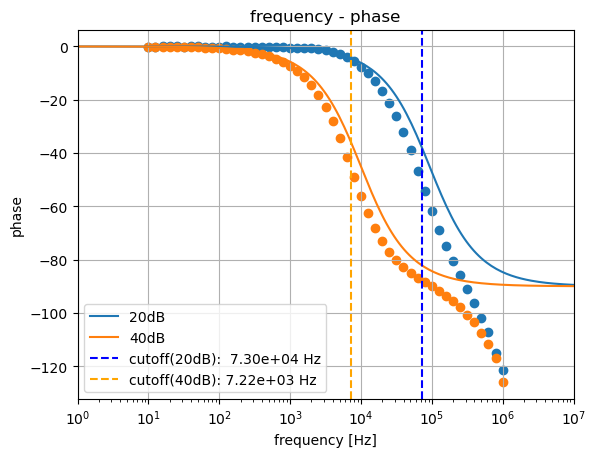

In [630]:
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency [Hz]", ylabel="phase", grid="both", xlim=(1,1e7),xscale="log", title="frequency - phase")
axstg.plot_func(ax, gain_phase_20_theory,label = "20dB")
axstg.plot_func(ax, gain_phase_40_theory, label = "40dB")
ax.scatter(gain_20["freq"], gain_20["phase"])
ax.scatter(gain_40["freq"], gain_40["phase"])
ax.axvline(x=freq_17dB, color='b', linestyle='--', label=f'cutoff(20dB):  {freq_17dB:.2e} Hz')
ax.axvline(x=freq_37dB, color='orange', linestyle='--', label=f'cutoff(40dB): {freq_37dB:.2e} Hz')
axstg.apply_axes(ax)

In [631]:
#開ループ特性


# (5)
微分回路

f_r:
f_f:

In [632]:
Rr = 9981
Rf = 99090
Cr = 2.186e-7
Cf = 2e-10
fr = 1/(2*np.pi*Rr*Cr)
ff = 1/(2*np.pi*Rf*Cf)  
f_peak = np.sqrt((A0*wp)/(Cr*Rf))/2/np.pi
print(f"f_r = {fr:.3} Hz")
print(f"f_f = {ff:.3} Hz")
print(f"f_peak = {f_peak:.3} Hz")

f_r = 72.9 Hz
f_f = 8.03e+03 Hz
f_peak = 2.71e+03 Hz


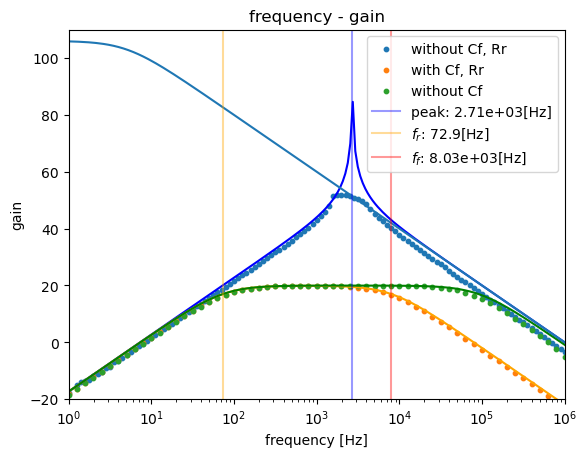

In [638]:
#(Cf,Rr無し)
def b(f):
    return 1/(1+1j*(2*np.pi*f*Cr*Rf))
gain_noCR = lambda f: 20*np.log10(np.abs(-1j*2*np.pi*f*Cr*Rf*A(f)*b(f)/(1+A(f)*b(f))))
data_noC = pd.read_csv("2_bode_derv_woutcf.csv")
#Cfだけ無し
data_noCR = pd.read_csv("2_bode_derv_woutf_wider.csv")

# gain_noC = lambda f: 20*np.log10(np.abs(-1j*2*np.pi*f*Cr*Rf*A(f)*b2(f)/(1+A(f)*b2(f))))

#(Cf,Rr有り)
gain_CR = lambda f: 20*np.log10(np.abs(-1j*(2*np.pi*f*Cr*Rf)/(1+1j*(2*np.pi*f*Cr*Rr))/(1+1j*(2*np.pi*f*Cf*Rf))))
dt = lambda f: 20*np.log10(np.abs(-1j*(2*np.pi*f*Cr*Rf)/(1+1j*(2*np.pi*f*Cr*0))/(1+1j*(2*np.pi*f*0*Rf))))
data_CR = pd.read_csv("2_bode_derv.csv")
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency [Hz]", ylabel="gain", xlim=(1,1e6),ylim=(-20,110), xscale="log", title="frequency - gain")
axstg.plot_func(ax, gain_noCR,c="b")
axstg.plot_func(ax, gain_CR,c="orange")
def b2(f):
    s = 1j*2*np.pi*f
    return (Rr+1/(s*Cr))/(Rr+Rf+1/(s*Cr))
gain_noC = lambda f: 20*np.log10(np.abs(-1j*2*np.pi*f*Cr*Rf/(1j*2*np.pi*f*Cr*Rr+1)*A(f)*b2(f)/(1+A(f)*b2(f))))

axstg.plot_func(ax, gain_noC,c="green")
ax.scatter(data_noCR["freq"], 20*np.log10(data_noCR["gain"]), s=10, label="without Cf, Rr")
ax.scatter(data_CR["freq"], 20*np.log10(data_CR["gain"]), s=10,label="with Cf, Rr")
ax.scatter(data_noC["freq"], 20*np.log10(data_noC["gain"]), s=10,label="without Cf")
axstg.plot_func(ax, gain_dB)
ax.axvline(f_peak, c="b", alpha=0.4, label=f"peak: {f_peak:.3}[Hz]")
ax.axvline(fr, c="orange", alpha=0.4, label=f"$f_r$: {fr:.3}[Hz]")
ax.axvline(ff, c="red", alpha=0.4, label=f"$f_f$: {ff:.3}[Hz]")
axstg.apply_axes(ax)

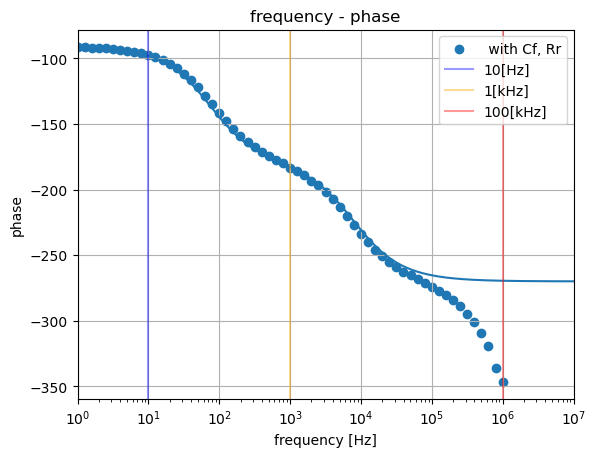

In [634]:
def adjust(phases):
    for i in range (len(phases)):
        if phases[i] > 0:
            phases[i] -= 360
    return phases
def gain_CR_phase(f):
    return np.angle(-1j*(2*np.pi*f*Cr*Rf)/(1+1j*(2*np.pi*f*Cr*Rr))/(1+1j*(2*np.pi*f*Cf*Rf)))/np.pi*180
# gain_CR_phase = lambda f: (lambda phase: phase if phase <= 0 else phase - 360)(np.angle(-1j*(2*np.pi*f*Cr*Rf)/(1+1j*(2*np.pi*f*Cr*Rr))/(1+1j*(2*np.pi*f*Cf*Rf)),deg=True))
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlabel="frequency [Hz]", ylabel="phase", grid="both", xlim=(1,1e7),xscale="log", title="frequency - phase")
x = np.array(np.geomspace(1, 1e7, 200))
ax.plot(x, adjust(gain_CR_phase(x)))
ax.scatter(data_CR["freq"], data_CR["phase"], label=" with Cf, Rr")
ax.axvline(10, c="b", alpha=0.4, label="10[Hz]")
ax.axvline(1000, c="orange", alpha=0.4, label="1[kHz]")
ax.axvline(1000000, c="red", alpha=0.4, label="100[kHz]")
axstg.apply_axes(ax)


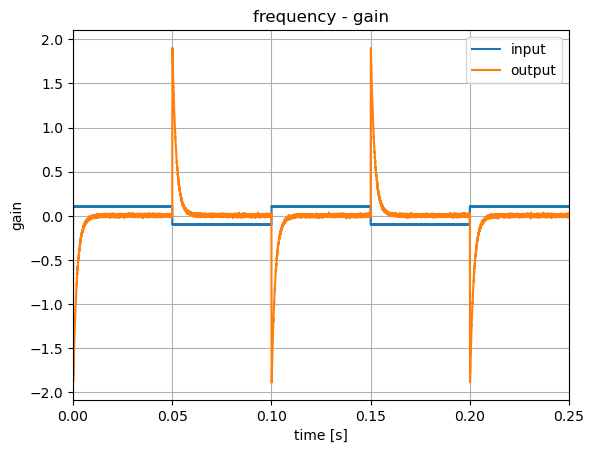

In [635]:
#方形波 微分領域
derv = pd.read_csv("2_osc_derv_200mVpp_10Hz.csv")
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlim=(0,0.25),xlabel="time [s]", ylabel="gain", grid="both",title="frequency - gain")
ax.plot(derv["freq"], derv["CH1"], label="input")
ax.plot(derv["freq"], derv["CH2"], label="output")
axstg.apply_axes(ax)

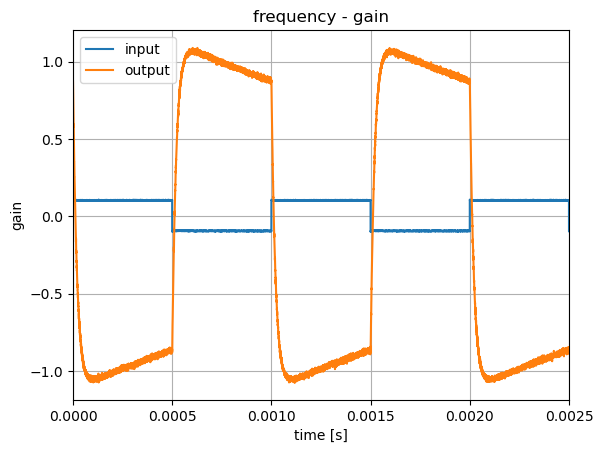

In [636]:
#方形波 非反転領域
noinv = pd.read_csv("2_osc_derv_200mVpp_1kHz.csv")
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True,xlim=(0,0.0025), xlabel="time [s]", ylabel="gain", grid="both",title="frequency - gain")
ax.plot(noinv["freq"], noinv["CH1"], label="input")
ax.plot(noinv["freq"], noinv["CH2"], label="output")
axstg.apply_axes(ax)

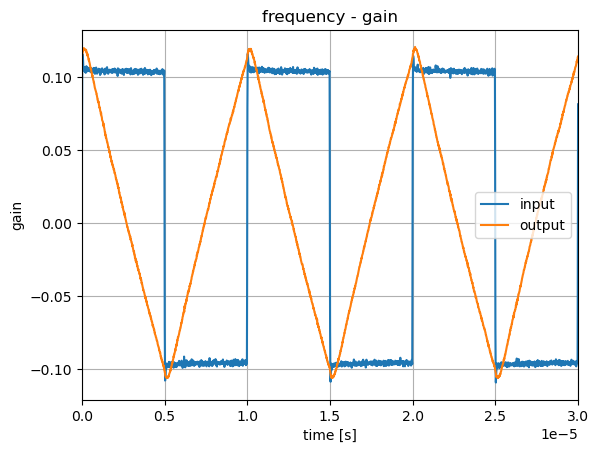

In [637]:
#方形波 積分領域
integral = pd.read_csv("2_osc_derv_200mVpp_100kHz.csv")
fig = plt.figure()
ax = fig.add_subplot(111)
axstg = AxesSetting(legend=True, xlim=(0,3e-5),xlabel="time [s]", ylabel="gain", grid="both",title="frequency - gain")
ax.plot(integral["freq"], integral["CH1"], label="input")
ax.plot(integral["freq"], integral["CH2"], label="output")

axstg.apply_axes(ax)

In [641]:
wafer_yield = 1
wafer_diameter = 30 #cm
N=12
die_area = 0.21936984356311146**2
cost_of_wafer = 7000
defects_per_unit_area = 0.047 #/cm2
die_per_wafer = np.pi*(wafer_diameter/2)**2/die_area - np.pi*wafer_diameter/np.sqrt(2*die_area)
die_yield = wafer_yield/(1+defects_per_unit_area*die_area)**N
cost_die = cost_of_wafer/(die_per_wafer*die_yield)
print(cost_die)
price  = 1.00
gross_margin = 0.5
cost = 0.50

0.5000000000000154


In [643]:
import numpy as np
from scipy.optimize import fsolve

wafer_yield = 1
wafer_diameter = 30
N = 12
cost_of_wafer = 7000
defects_per_unit_area = 0.047

def cost_die_function(ans):
    die_area = ans**2
    die_per_wafer = np.pi * (wafer_diameter / 2)**2 / die_area - np.pi * wafer_diameter / np.sqrt(2 * die_area)
    die_yield = wafer_yield / (1 + defects_per_unit_area * die_area)**N
    cost_die = cost_of_wafer / (die_per_wafer * die_yield)
    return cost_die

def equation(ans):
    return cost_die_function(ans) - 0.5

initial_guess = 1

solution = fsolve(equation, initial_guess)

print(solution[0],"cm")


0.21936984356311146 cm
